In [ ]:
# Decision Tree Assignment
# Dataset: Drug A, B, C, X, Y

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/Pranto210102/ML-Lab-Algorithm/refs/heads/main/drug200.csv"
df = pd.read_csv(url)
df.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df.info()
df.describe(include='all')
df.isnull().sum()
df = df.dropna()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

df.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


In [5]:
X = df.drop('Drug', axis=1)   # target column is Drug
y = df['Drug']


In [6]:
# Train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [7]:
# CART Model (Gini) with Cross-Validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10]
}

cart = DecisionTreeClassifier(
    criterion='gini',
    random_state=42
)

cart_cv = GridSearchCV(
    cart,
    param_grid,
    cv=5,
    scoring='accuracy'
)

cart_cv.fit(X_train, y_train)
best_cart = cart_cv.best_estimator_

cart_cv.best_params_


{'max_depth': 5, 'min_samples_split': 2}

In [8]:
#ID3 Model (Entropy) with Cross-Validation
id3 = DecisionTreeClassifier(
    criterion='entropy',
    random_state=42
)

id3_cv = GridSearchCV(
    id3,
    param_grid,
    cv=5,
    scoring='accuracy'
)

id3_cv.fit(X_train, y_train)
best_id3 = id3_cv.best_estimator_

id3_cv.best_params_


{'max_depth': 5, 'min_samples_split': 2}

In [9]:
# Predictions on Test Set
cart_pred = best_cart.predict(X_test)
id3_pred = best_id3.predict(X_test)

cart_prob = best_cart.predict_proba(X_test)
id3_prob = best_id3.predict_proba(X_test)


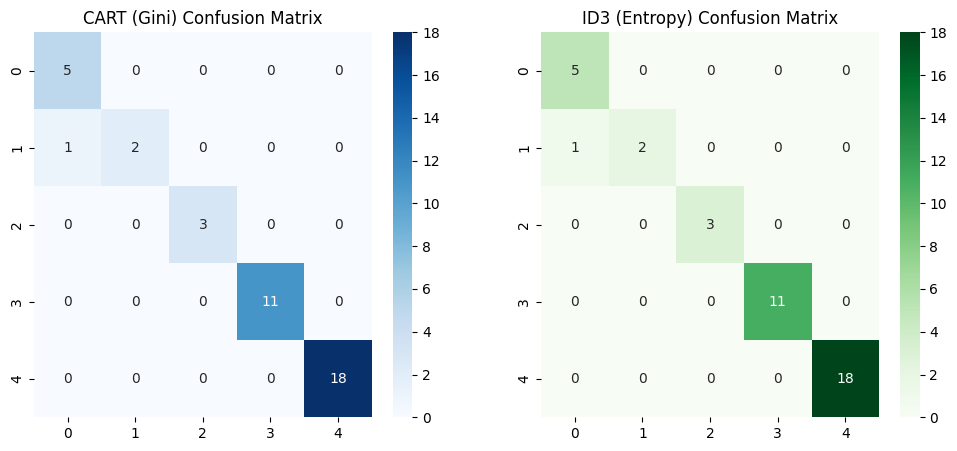

In [10]:
# Confusion Matrix (2×1 Comparison)
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, cart_pred),
            annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title("CART (Gini) Confusion Matrix")

sns.heatmap(confusion_matrix(y_test, id3_pred),
            annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title("ID3 (Entropy) Confusion Matrix")

plt.show()


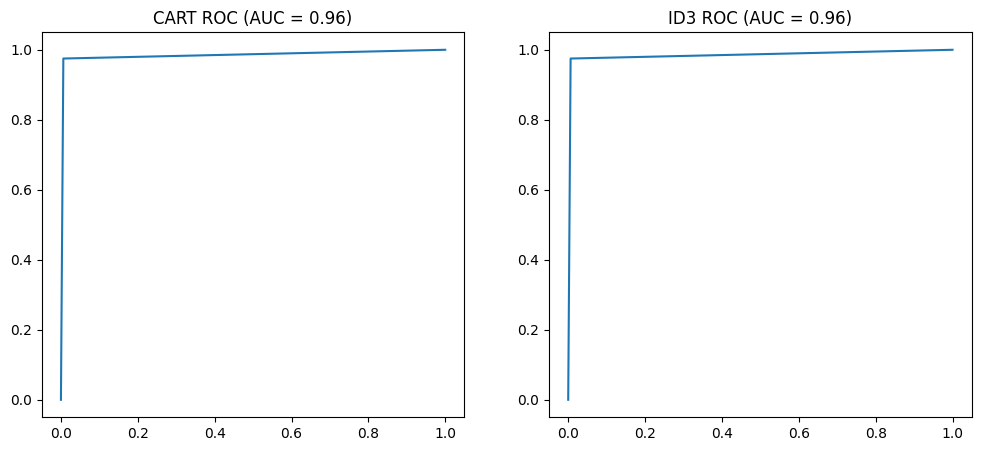

In [11]:
# ROC Curve (2×1 Comparison)
from sklearn.metrics import roc_curve, roc_auc_score
# One-vs-rest ROC (multiclass handled automatically)
cart_auc = roc_auc_score(y_test, cart_prob, multi_class='ovr')
id3_auc = roc_auc_score(y_test, id3_prob, multi_class='ovr')

cart_fpr, cart_tpr, _ = roc_curve(
    pd.get_dummies(y_test).values.ravel(),
    cart_prob.ravel()
)

id3_fpr, id3_tpr, _ = roc_curve(
    pd.get_dummies(y_test).values.ravel(),
    id3_prob.ravel()
)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(cart_fpr, cart_tpr)
ax[0].set_title(f"CART ROC (AUC = {cart_auc:.2f})")

ax[1].plot(id3_fpr, id3_tpr)
ax[1].set_title(f"ID3 ROC (AUC = {id3_auc:.2f})")

plt.show()


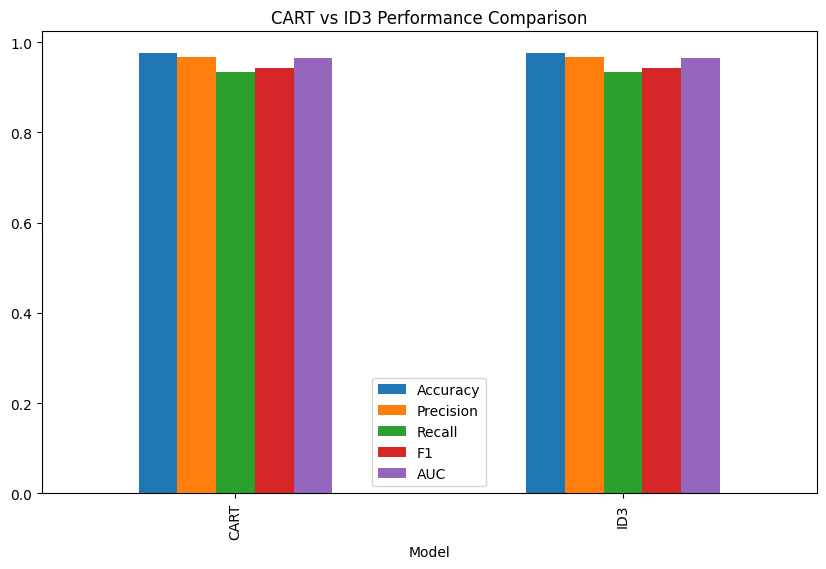

In [12]:
# Evaluation Metrics Bar Chart
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
metrics = pd.DataFrame({
    'Model': ['CART', 'ID3'],
    'Accuracy': [
        accuracy_score(y_test, cart_pred),
        accuracy_score(y_test, id3_pred)
    ],
    'Precision': [
        precision_score(y_test, cart_pred, average='macro'),
        precision_score(y_test, id3_pred, average='macro')
    ],
    'Recall': [
        recall_score(y_test, cart_pred, average='macro'),
        recall_score(y_test, id3_pred, average='macro')
    ],
    'F1': [
        f1_score(y_test, cart_pred, average='macro'),
        f1_score(y_test, id3_pred, average='macro')
    ],
    'AUC': [cart_auc, id3_auc]
})

metrics.set_index('Model').plot(kind='bar', figsize=(10,6))
plt.title("CART vs ID3 Performance Comparison")
plt.show()


In [13]:
# Decision Boundary
!pip install mlxtend


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but DecisionTreeClassifier is expecting 5 features as input.

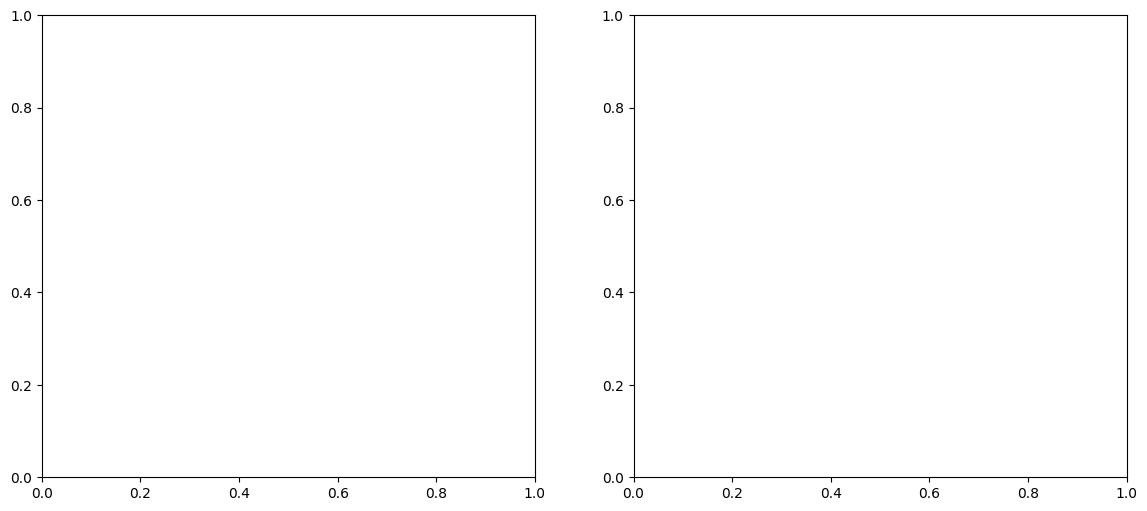

In [14]:
from mlxtend.plotting import plot_decision_regions
X_vis = X_train[['Age', 'Na_to_K']].values
y_vis = y_train.values

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

plot_decision_regions(X_vis, y_vis, clf=best_cart, ax=ax[0])
ax[0].set_title("CART Decision Boundary")

plot_decision_regions(X_vis, y_vis, clf=best_id3, ax=ax[1])
ax[1].set_title("ID3 Decision Boundary")

plt.show()


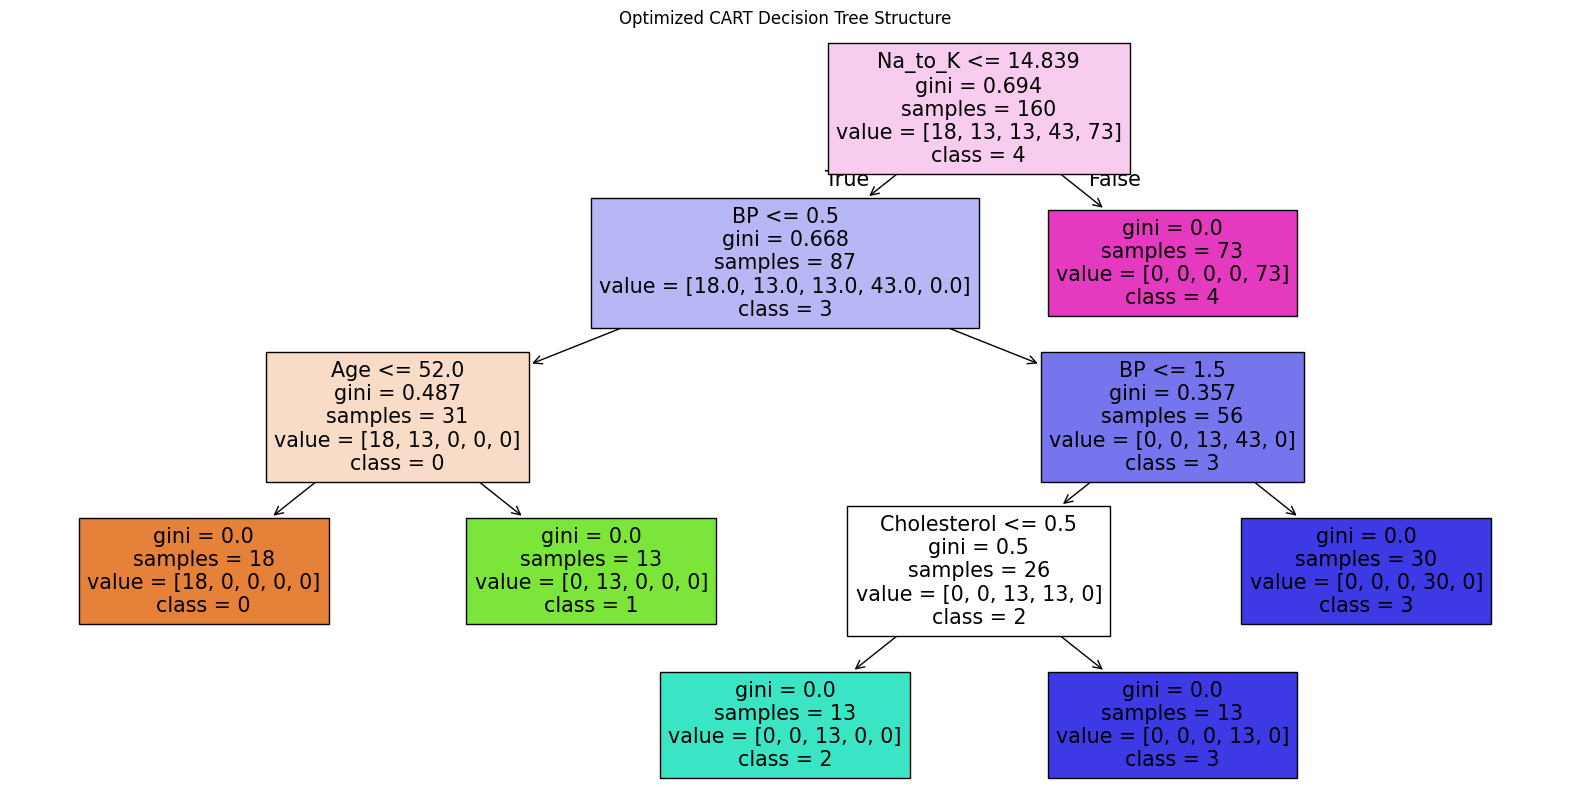

In [15]:
# Optimized Tree Structure
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(
    best_cart,
    feature_names=X.columns,
    class_names=[str(c) for c in best_cart.classes_],
    filled=True
)
plt.title("Optimized CART Decision Tree Structure")
plt.show()
